# Tech Worker Age_Draft2

In [89]:
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
import datetime
import matplotlib.dates as mdates

from scipy import stats
from matplotlib.dates import DateFormatter
from IPython.display import display

# Load Raw Data

In [90]:
db_survey = sqlite3.connect(
    "C:\\Users\\Space\\Documents\\py\\Projects\\TuringCollege\\TechMentalHealth\\DataSet\\mental_health.sqlite"
)

# Display Parameters

## Display Features

In [91]:
%matplotlib inline
pd.options.display.max_rows = 300000
pd.options.display.max_columns = 999
pd.options.display.max_colwidth = 500

## Colors

In [92]:
ord_color = "bisque"
spec_lev1 = "crimson"
spec_lev2 = "orangered"
spec_lev3 = "lightcoral"
male_color = "royalblue"
female_color = "pink"
graph_color1 = "indianred"
graph_color2 = "slategrey"

## Figure Parameters

In [93]:
size = 20

params = {
    "font.family": "Times New Roman",
    "font.size": size,
    "axes.labelsize": size,
    "xtick.labelsize": size * 0.75,
    "ytick.labelsize": size * 0.75,
    "figure.titlesize": size * 1.5,
    "axes.titlesize": size * 1.5,
    "axes.titlepad": size,
    "axes.labelpad": size - 10,
    "lines.linewidth": 2,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.spines.left": False,
    "axes.spines.bottom": False,
    "legend.fontsize": size,
}

# Tech Workers in Tech Companies

In [94]:
df_Answer9 = pd.read_sql_query(
    "SELECT USERID FROM Answer where QuestionID = 9 AND AnswerText = '1'",
    db_survey
)

In [95]:
df_Answer13 = pd.read_sql_query(
    "SELECT USERID FROM Answer where QuestionID = 13 AND AnswerText = '1'",
    db_survey
)

In [96]:
df_TechinTech = pd.merge(df_Answer13, df_Answer9 , on='UserID', how='inner')

In [97]:
Total_TechinTech = df_TechinTech.count()

# Tech Worker Age

In [98]:
df_Answer1 = pd.read_sql_query(
    "SELECT * FROM Answer where QuestionID = 1", db_survey
)

In [108]:
df_Answer1 = pd.merge(df_TechinTech, df_Answer1 , on='UserID', how='inner')

In [100]:
df_Answer1["AnswerText"] = df_Answer1["AnswerText"].astype(int)

In [101]:
df_Answer1.sort_values("AnswerText", inplace=True)

In [102]:
df_Answer1 = df_Answer1[df_Answer1.AnswerText >= 20]
df_Answer1 = df_Answer1[df_Answer1.AnswerText <= 75]

In [103]:
df_Age_count = df_Answer1.AnswerText.value_counts()
df_Age_count = pd.DataFrame(df_Age_count)
df_Age_count = df_Age_count.reset_index()

In [104]:
df_Age_count = df_Age_count.rename(columns={"index": "Age", "AnswerText": "Count"})

In [105]:
df_Age_count.loc[df_Age_count['Age'].between(20, 29, 'both'), 'Range'] = '20s'
df_Age_count.loc[df_Age_count['Age'].between(30, 39, 'both'), 'Range'] = '30s'
df_Age_count.loc[df_Age_count['Age'].between(40, 49, 'both'), 'Range'] = '40s'
df_Age_count.loc[df_Age_count['Age'].between(50, 59, 'both'), 'Range'] = '50s'
df_Age_count.loc[df_Age_count['Age'].between(60, 69, 'both'), 'Range'] = '60s'
df_Age_count.loc[df_Age_count['Age'].between(70, 79, 'both'), 'Range'] = '70s'

In [106]:
df_Age_count_grouped = df_Age_count.groupby('Range')['Count'].sum()
df_Age_count_grouped = df_Age_count_grouped.to_frame()
df_Age_count_grouped = df_Age_count_grouped.reset_index()

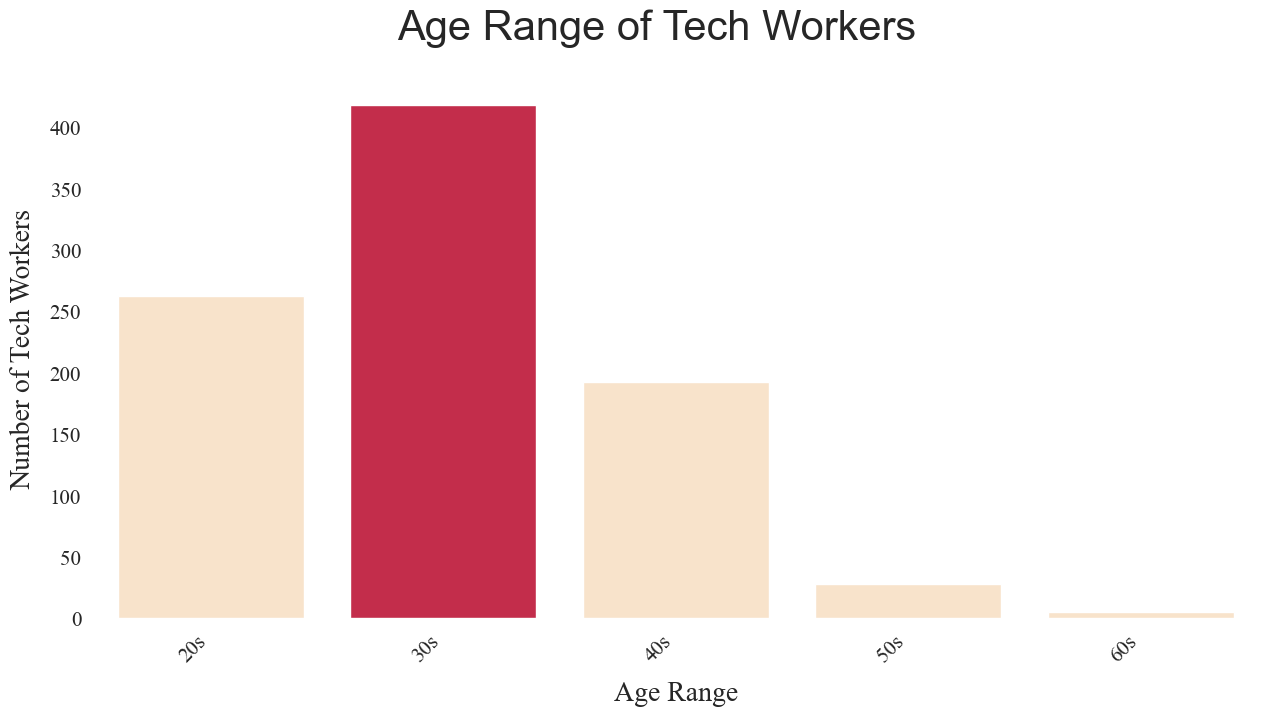

In [107]:
plt.rcParams.update(params)

fig, axes = plt.subplots(1, 1, figsize=(15, 7))
sns.set(style="white")

chart = sns.barplot(
    ax=axes,
    x="Range",
    y="Count",
    data=df_Age_count_grouped,
    errorbar=None,
    palette=[ord_color if x != "30s" else spec_lev1
        for x in df_Age_count_grouped["Range"]],
)


plt.xlabel("Age Range")
plt.ylabel("Number of Tech Workers")
plt.xticks()
plt.yticks()

chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment="right")
plt.suptitle("Age Range of Tech Workers in Tech Industry")

plt.show()